## Assignment - 2: MLP - Diabetes Prediction
### ID: eo9232
### Name: Md Reza
### IE7860 - Winter 2022

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display

import tensorflow 
tensorflow.random.set_seed(432)
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## **Exploratory Data Analysis**

In [2]:
diadetes_df = pd.read_csv('diabetes.csv')

In [3]:
diadetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## **Data Preprocessing**

## **Handling missing values** ##

In [4]:
diadetes_df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [5]:
diadetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
print("Number of rows with 0 values for each variable")
for col in diadetes_df.columns:
    missing_rows = diadetes_df.loc[diadetes_df[col]==0].shape[0]
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [7]:
# Replace '0' with nan
diadetes_df['Glucose'] = diadetes_df['Glucose'].replace(0, np.nan)
diadetes_df['BloodPressure'] = diadetes_df['BloodPressure'].replace(0, np.nan)
diadetes_df['SkinThickness'] = diadetes_df['SkinThickness'].replace(0, np.nan)
diadetes_df['Insulin'] = diadetes_df['Insulin'].replace(0, np.nan)
diadetes_df['BMI'] = diadetes_df['BMI'].replace(0, np.nan)

In [8]:
print("Number of rows with 0 values for each variable")
for col in diadetes_df.columns:
    missing_rows = diadetes_df.loc[diadetes_df[col]==0].shape[0]
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [9]:
# Replace nan with average value
diadetes_df['Glucose'] = diadetes_df['Glucose'].fillna(diadetes_df['Glucose'].mean())
diadetes_df['BloodPressure'] = diadetes_df['BloodPressure'].fillna(diadetes_df['BloodPressure'].mean())
diadetes_df['SkinThickness'] = diadetes_df['SkinThickness'].fillna(diadetes_df['SkinThickness'].mean())
diadetes_df['Insulin'] = diadetes_df['Insulin'].fillna(diadetes_df['Insulin'].mean())
diadetes_df['BMI'] = diadetes_df['BMI'].fillna(diadetes_df['BMI'].mean())

## Data Preperation

In [10]:
# Scaled the dataset
diadetes_df_scaled = preprocessing.scale(diadetes_df)
diadetes_df_scaled = pd.DataFrame(diadetes_df_scaled, columns=diadetes_df.columns)
diadetes_df_scaled['Outcome'] = diadetes_df['Outcome']
diadetes_df = diadetes_df_scaled
diadetes_df.describe().loc[['mean', 'std','max'],].round(2).abs()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.35
std,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,0.48
max,3.91,2.54,4.1,7.95,8.13,5.04,5.88,4.06,1.00


#### Split the data set in a training set and a test set 

In [11]:
from sklearn.preprocessing import StandardScaler
X = diadetes_df.loc[:, diadetes_df.columns != 'Outcome']
y = diadetes_df.loc[:, 'Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.10)

In [13]:
# Convert DataFrame into np array
X_train = np.array(X_train) 
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

print (X.shape)
print (y.shape)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(768, 8)
(768,)
(691, 8)
(691,)
(77, 8)
(77,)


## Hyper-parameters tune with GridSearchCV to Find the Best Activation Function & Optimizer

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
grid = {'solver': ['adam', 'sgd','adamx'], 'activation': ['softmax', 'sigmoid', 'relu']}
clf_cv = GridSearchCV(MLPClassifier(random_state=1, max_iter=1000, hidden_layer_sizes=(2,2), alpha=1e-5), grid, n_jobs=-1, cv=10)

clf_cv.fit(X_train, y_train)

print('\x1b[1;03;30;46m'+'GridSearch():\x1b[0m\n')
combination = 1
for x in grid.values():
    combination *= len(x)
print('For this GridSearch, there are {} combinations'.format(combination))
print("Best Configuration: ",clf_cv.best_params_)
print("Accuracy CV:",clf_cv.best_score_)
ppn_cv = clf_cv.best_estimator_
print('Test accuracy: %.3f' % clf_cv.score(X_test, y_test))

GridSearch():

For this GridSearch, there are 9 combinations
Best Configuration:  {'activation': 'relu', 'solver': 'adam'}
Accuracy CV: 0.7669772256728778
Test accuracy: 0.818


In [15]:
grid_activation = list(clf_cv.best_params_.values())[0]
grid_optimizer = list(clf_cv.best_params_.values())[1]

## Building The MLP Model

In [16]:
def diabetes_mlp_model(factor, rate):
    np.random.seed(7)
    model = Sequential([
        Dense(32, kernel_regularizer=l2(factor), activation = grid_activation, input_shape=(8,)),
        Dropout(rate),
        Dense(32, kernel_regularizer=l2(factor), activation = grid_activation),
        Dropout(rate),
        Dense(1, activation='sigmoid')
    ])
    return model

In [17]:
model = diabetes_mlp_model(1e-5, 0.1)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                288       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


## **Model Compilation** ##

In [18]:
es = EarlyStopping(monitor='val_loss', 
                   mode='auto', 
                   verbose=0, 
                   patience=8
                  )

model.compile(loss='binary_crossentropy', 
              optimizer=grid_optimizer, 
              metrics=['accuracy']
             )

history = model.fit(X_train,y_train,  
                    epochs=200,
                    batch_size=30,
                    verbose=1, 
                    validation_split=0.20,
                    callbacks=[es]
                   )

Train on 552 samples, validate on 139 samples
Epoch 1/200
552/552 [==============================] - 1s 2ms/sample - loss: 0.6217 - accuracy: 0.6558 - val_loss: 0.5677 - val_accuracy: 0.6906
Epoch 2/200
552/552 [==============================] - 0s 110us/sample - loss: 0.5508 - accuracy: 0.7029 - val_loss: 0.5312 - val_accuracy: 0.7986
Epoch 3/200
552/552 [==============================] - 0s 101us/sample - loss: 0.5091 - accuracy: 0.7337 - val_loss: 0.5118 - val_accuracy: 0.7626
Epoch 4/200
552/552 [==============================] - 0s 86us/sample - loss: 0.4916 - accuracy: 0.7500 - val_loss: 0.5025 - val_accuracy: 0.7698
Epoch 5/200
552/552 [==============================] - 0s 94us/sample - loss: 0.4817 - accuracy: 0.7464 - val_loss: 0.4976 - val_accuracy: 0.7842
Epoch 6/200
552/552 [==============================] - 0s 131us/sample - loss: 0.4626 - accuracy: 0.7681 - val_loss: 0.4960 - val_accuracy: 0.7914
Epoch 7/200
552/552 [==============================] - 0s 82us/sample - loss

## Evaluate The MLP Model

#### **Training accuracy** ####

In [19]:
# Evaluate Model
TestAccuracy = model.evaluate (X_train, y_train, verbose=0)

for name, value in zip (model.metrics_names, TestAccuracy):
    print("Train - " + name, ': ', value * 100)
print()

Train - loss :  43.55998288101467
Train - accuracy :  78.58176827430725



#### **Testing accuracy** ####

In [20]:
# Evaluate Model
TestAccuracy = model.evaluate (X_test, y_test, verbose=0)

for name, value in zip (model.metrics_names, TestAccuracy):
    print("Test - " + name, ': ', value * 100)
print()

Test - loss :  42.556454647671096
Test - accuracy :  81.81818127632141



In [21]:
pos = np.argmin(history.history['val_loss'])
print("The epoch with the minimum validation loss is:", pos+1)
print("The Validation Accuracy is: {0:.5f}".format(history.history['val_accuracy'][pos]))

The epoch with the minimum validation loss is: 6
The Validation Accuracy is: 0.79137


In [22]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

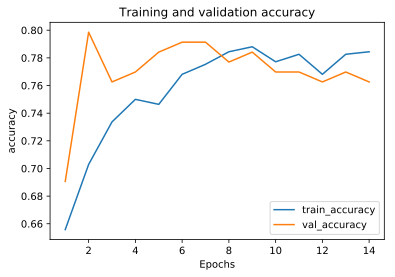

In [23]:
plot_metric(history, 'accuracy')

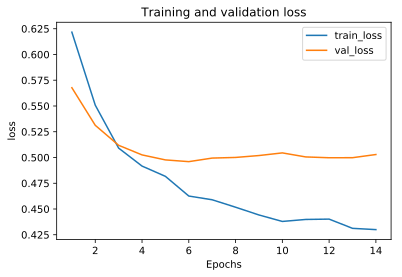

In [24]:
plot_metric(history, 'loss')

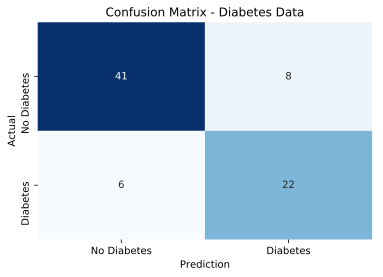

In [25]:
# Results - Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_test_pred = model.predict_classes(X_test)
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot = True, xticklabels = ['No Diabetes', 'Diabetes'], yticklabels = ['No Diabetes', 'Diabetes'], cbar = False, cmap = 'Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix - Diabetes Data")
plt.show()

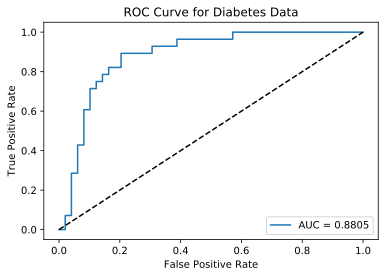

In [26]:
# Results - ROC Curve
from sklearn.metrics import roc_curve 
from sklearn import metrics
y_test_pred_probs = model.predict(X_test)
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
auc = metrics.roc_auc_score(y_test, y_test_pred_probs)
plt.plot(FPR, TPR, label= 'AUC = {0:.4f}'.format(auc))
plt.plot([0,1],[0,1],'--', color='black')
plt.title('ROC Curve for Diabetes Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()